In [1]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
4,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0


In [2]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-11,37.0,7.0,95.0,18.0,0.0,0.0,2.0,81.0,16.0,4.0,...,7.0,0.0,35527.0,21.0,42.0,4.0,2.0,0.0,1.0,0.0
2020-04-12,34.0,17.0,64.0,21.0,0.0,0.0,0.0,162.0,30.0,6.0,...,0.0,1.0,28391.0,7.0,172.0,0.0,1.0,0.0,0.0,3.0
2020-04-13,52.0,13.0,89.0,16.0,0.0,0.0,0.0,66.0,46.0,0.0,...,0.0,0.0,27620.0,11.0,69.0,6.0,4.0,0.0,3.0,0.0
2020-04-14,58.0,21.0,69.0,8.0,0.0,0.0,2.0,69.0,26.0,0.0,...,14.0,0.0,25023.0,9.0,133.0,8.0,3.0,0.0,2.0,3.0
2020-04-15,49.0,8.0,87.0,13.0,0.0,0.0,0.0,160.0,72.0,0.0,...,7.0,0.0,26922.0,12.0,167.0,4.0,9.0,0.0,0.0,0.0


In [3]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    609516.0
Spain                       172541.0
Italy                       162488.0
Germany                     127584.0
France                      103573.0
United_Kingdom               93873.0
China                        83352.0
Iran                         74877.0
Turkey                       65111.0
Belgium                      31119.0
Netherlands                  27419.0
Canada                       27046.0
Switzerland                  25753.0
Brazil                       25262.0
Russia                       21102.0
dtype: float64

In [4]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,France,United_Kingdom,China,Iran,Turkey,Belgium,Netherlands,Canada,Switzerland,Brazil,Russia
dateRep,,,,,,,,,,,,,,,
2020-04-11,35527.0,4576.0,3951.0,4133.0,4342.0,5195.0,79.0,1972.0,4747.0,1684.0,1335.0,1385.0,733.0,1781.0,1786.0
2020-04-12,28391.0,4830.0,4694.0,2821.0,3114.0,8719.0,93.0,1837.0,5138.0,1351.0,1316.0,1168.0,592.0,1089.0,1667.0
2020-04-13,27620.0,4167.0,4092.0,2537.0,1613.0,5288.0,112.0,1657.0,4789.0,1629.0,1174.0,1064.0,400.0,1442.0,2186.0
2020-04-14,25023.0,3477.0,3153.0,2082.0,2673.0,4342.0,94.0,1617.0,4093.0,942.0,964.0,1298.0,279.0,1261.0,2558.0
2020-04-15,26922.0,3045.0,2972.0,2486.0,5497.0,5252.0,49.0,1574.0,4062.0,530.0,868.0,1383.0,254.0,1832.0,2774.0


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=18)
date_range = [first_date,last_date]

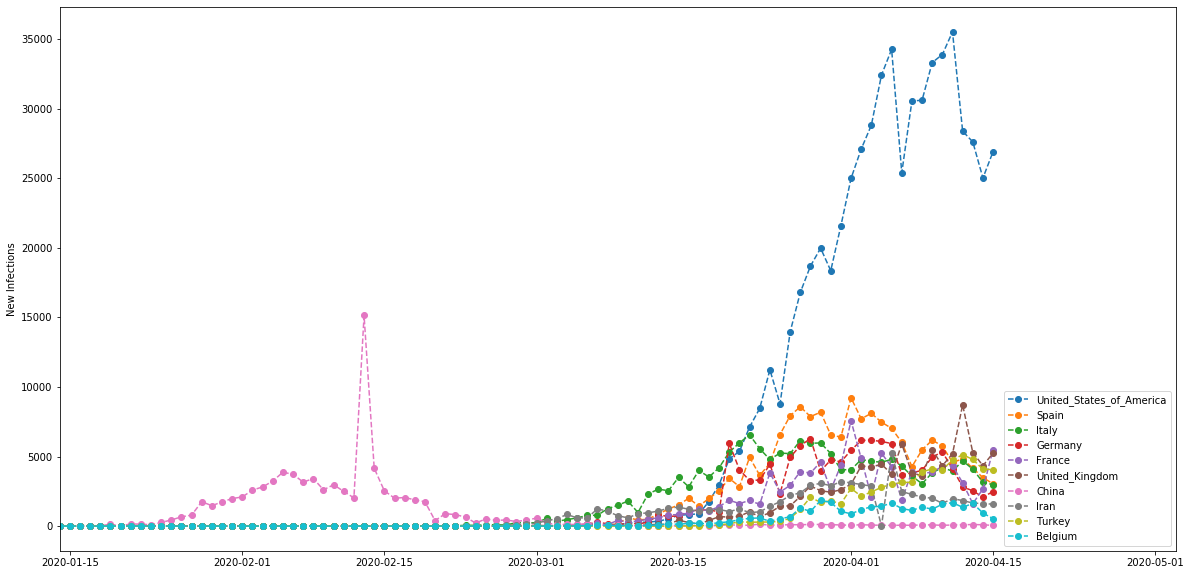

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

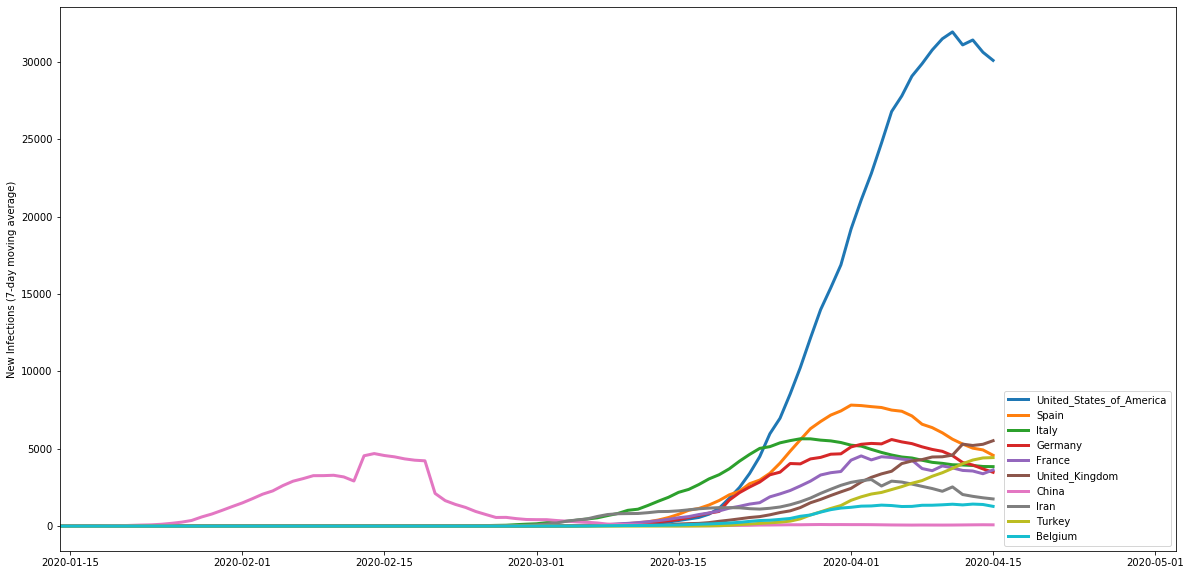

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Infections (7-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [8]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,France,United_Kingdom,China,Iran,Turkey,Belgium,Netherlands,Canada,Switzerland,Brazil,Russia
dateRep,,,,,,,,,,,,,,,
2020-04-11,501560.0,157022.0,147577.0,117658.0,90676.0,70272.0,83004.0,68192.0,47029.0,26667.0,23097.0,22133.0,24228.0,19638.0,11917.0
2020-04-12,529951.0,161852.0,152271.0,120479.0,93790.0,78991.0,83097.0,70029.0,52167.0,28018.0,24413.0,23301.0,24820.0,20727.0,13584.0
2020-04-13,557571.0,166019.0,156363.0,123016.0,95403.0,84279.0,83209.0,71686.0,56956.0,29647.0,25587.0,24365.0,25220.0,22169.0,15770.0
2020-04-14,582594.0,169496.0,159516.0,125098.0,98076.0,88621.0,83303.0,73303.0,61049.0,30589.0,26551.0,25663.0,25499.0,23430.0,18328.0
2020-04-15,609516.0,172541.0,162488.0,127584.0,103573.0,93873.0,83352.0,74877.0,65111.0,31119.0,27419.0,27046.0,25753.0,25262.0,21102.0


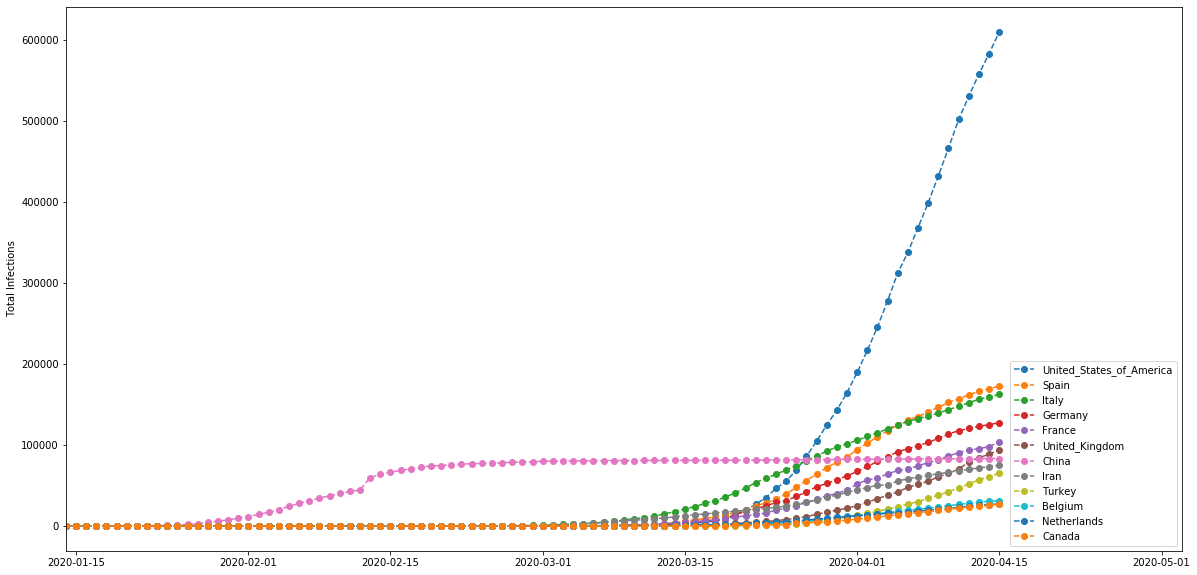

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

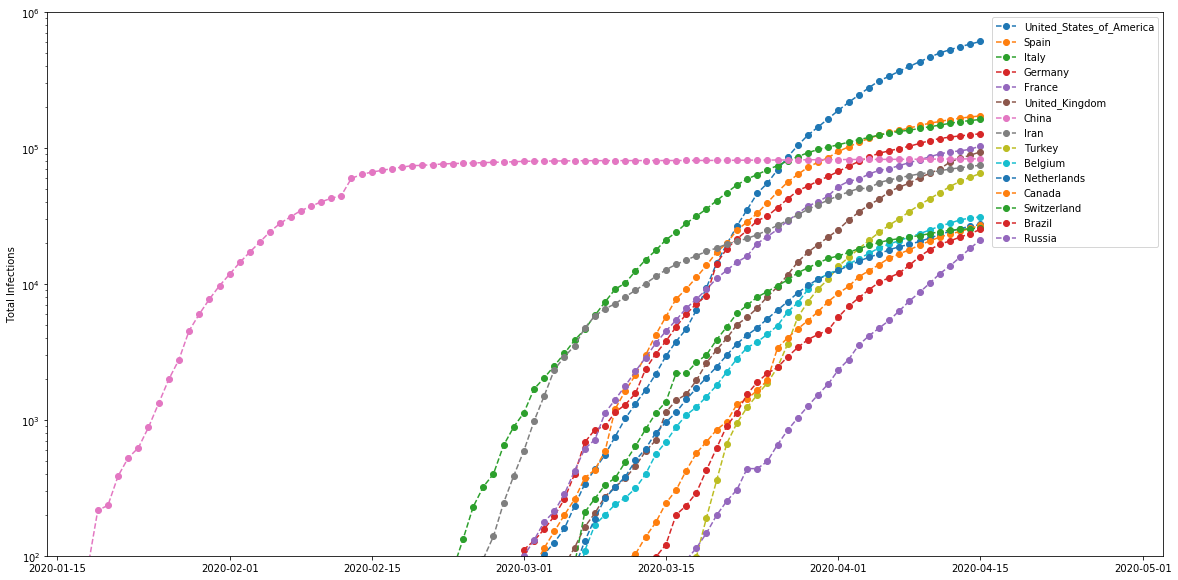

In [10]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,1000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [11]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Iran,Belgium,China,Germany,Netherlands,...,Czechia,Hungary,Colombia,Norway,Morocco,Israel,Japan,Pakistan,Argentina,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-09,1922.0,540.0,757.0,541.0,938.0,121.0,205.0,2.0,246.0,147.0,...,11.0,8.0,5.0,11.0,3.0,6.0,1.0,5.0,5.0,2.0
2020-04-10,1873.0,612.0,683.0,1341.0,881.0,117.0,283.0,1.0,266.0,148.0,...,13.0,11.0,14.0,8.0,4.0,15.0,4.0,3.0,14.0,3.0
2020-04-11,2087.0,570.0,605.0,987.0,980.0,122.0,496.0,3.0,171.0,115.0,...,7.0,8.0,11.0,4.0,10.0,9.0,3.0,5.0,3.0,4.0
2020-04-12,1831.0,619.0,510.0,635.0,917.0,125.0,327.0,0.0,129.0,132.0,...,10.0,14.0,20.0,6.0,4.0,6.0,10.0,15.0,7.0,3.0
2020-04-13,1500.0,431.0,619.0,561.0,737.0,117.0,254.0,2.0,126.0,94.0,...,9.0,10.0,9.0,5.0,7.0,2.0,4.0,7.0,6.0,5.0
2020-04-14,1541.0,564.0,517.0,574.0,717.0,111.0,303.0,0.0,170.0,86.0,...,5.0,13.0,3.0,11.0,8.0,13.0,7.0,3.0,3.0,1.0
2020-04-15,2408.0,604.0,567.0,762.0,778.0,98.0,254.0,1.0,285.0,122.0,...,18.0,12.0,15.0,13.0,0.0,7.0,10.0,11.0,7.0,2.0


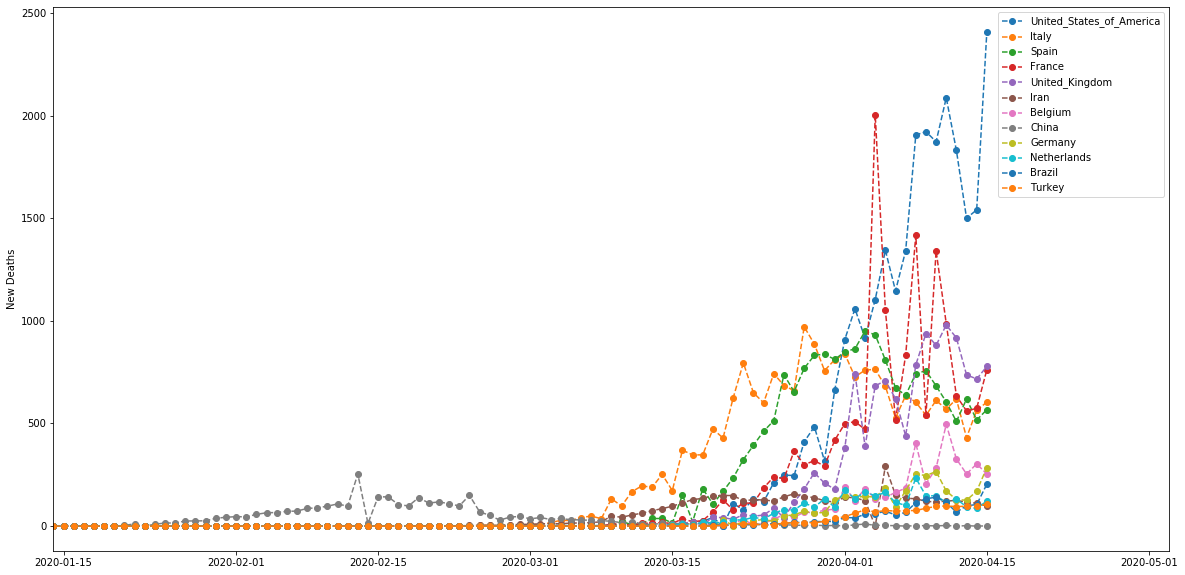

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

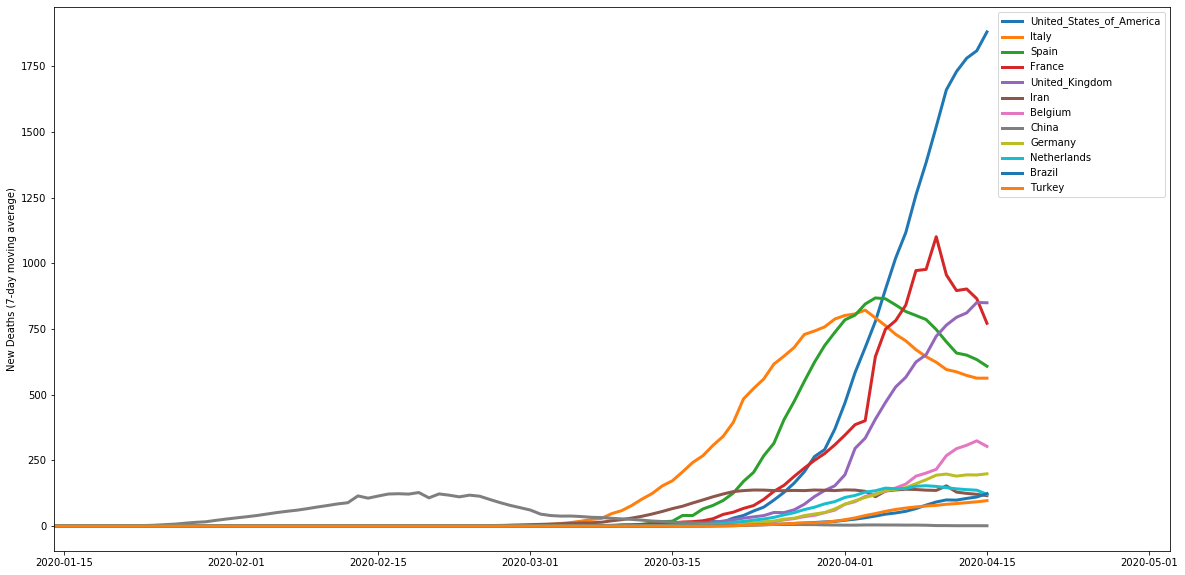

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [14]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Iran,Belgium,China,Germany,Netherlands,...,Czechia,Hungary,Colombia,Norway,Morocco,Israel,Japan,Pakistan,Argentina,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-11,18777.0,18851.0,15843.0,13197.0,8958.0,4232.0,3019.0,3343.0,2544.0,2511.0,...,119.0,85.0,80.0,92.0,107.0,95.0,88.0,71.0,82.0,90.0
2020-04-12,20608.0,19470.0,16353.0,13832.0,9875.0,4357.0,3346.0,3343.0,2673.0,2643.0,...,129.0,99.0,100.0,98.0,111.0,101.0,98.0,86.0,89.0,93.0
2020-04-13,22108.0,19901.0,16972.0,14393.0,10612.0,4474.0,3600.0,3345.0,2799.0,2737.0,...,138.0,109.0,109.0,103.0,118.0,103.0,102.0,93.0,95.0,98.0
2020-04-14,23649.0,20465.0,17489.0,14967.0,11329.0,4585.0,3903.0,3345.0,2969.0,2823.0,...,143.0,122.0,112.0,114.0,126.0,116.0,109.0,96.0,98.0,99.0
2020-04-15,26057.0,21069.0,18056.0,15729.0,12107.0,4683.0,4157.0,3346.0,3254.0,2945.0,...,161.0,134.0,127.0,127.0,126.0,123.0,119.0,107.0,105.0,101.0


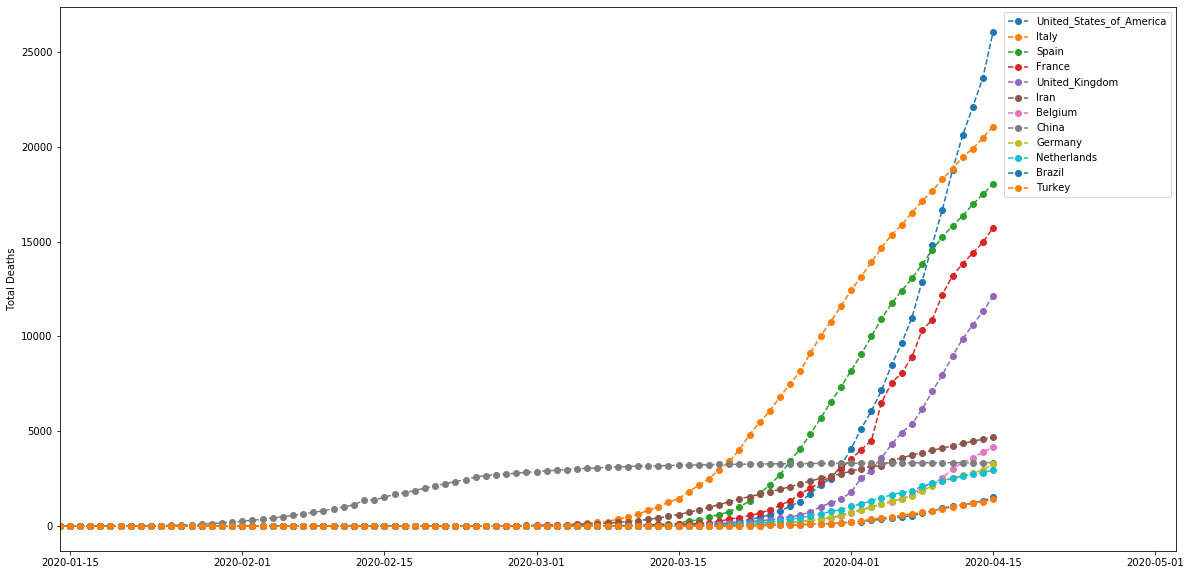

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

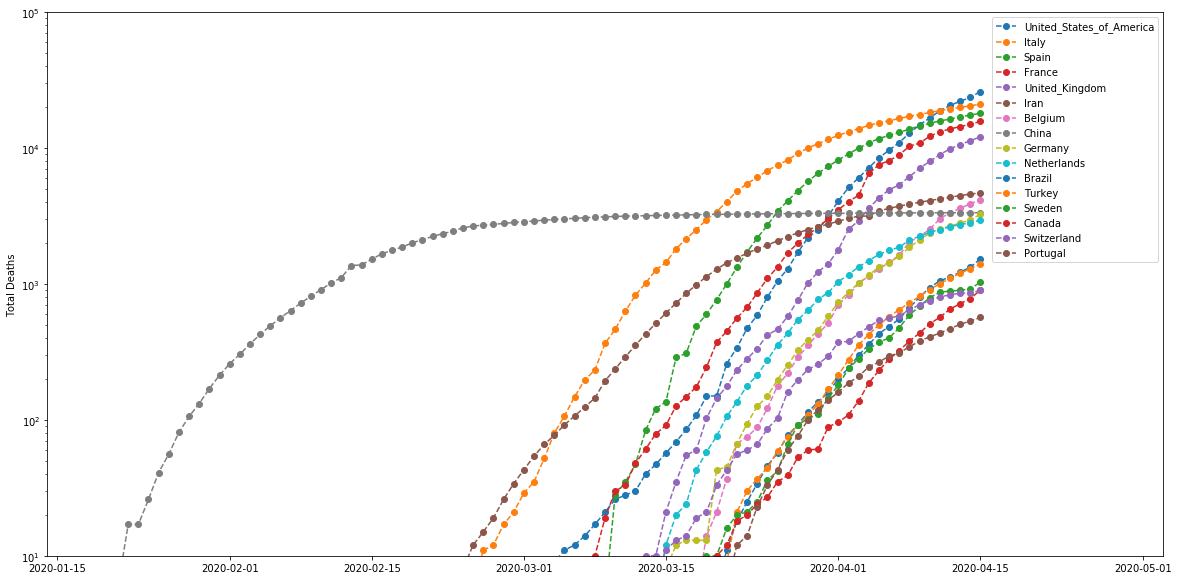

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [17]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [18]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

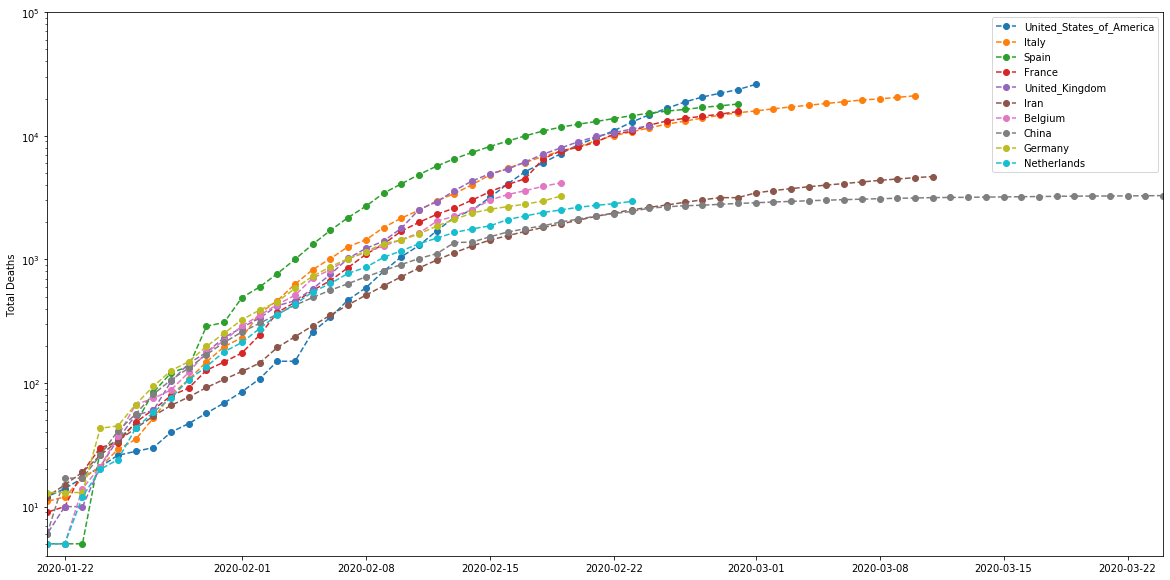

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=60)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [20]:
import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = italy

In [21]:
from scipy.optimize import curve_fit

#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     return y

#popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=1/(1+xdata))
popt, pcov = curve_fit(generalised_logistic, xdata, ydata)
popt

array([2.59077519e+04, 3.03007079e+00, 9.06756828e-02, 2.33697451e+00,
       1.69612937e-01])

Text(0, 0.5, 'Total Deaths')

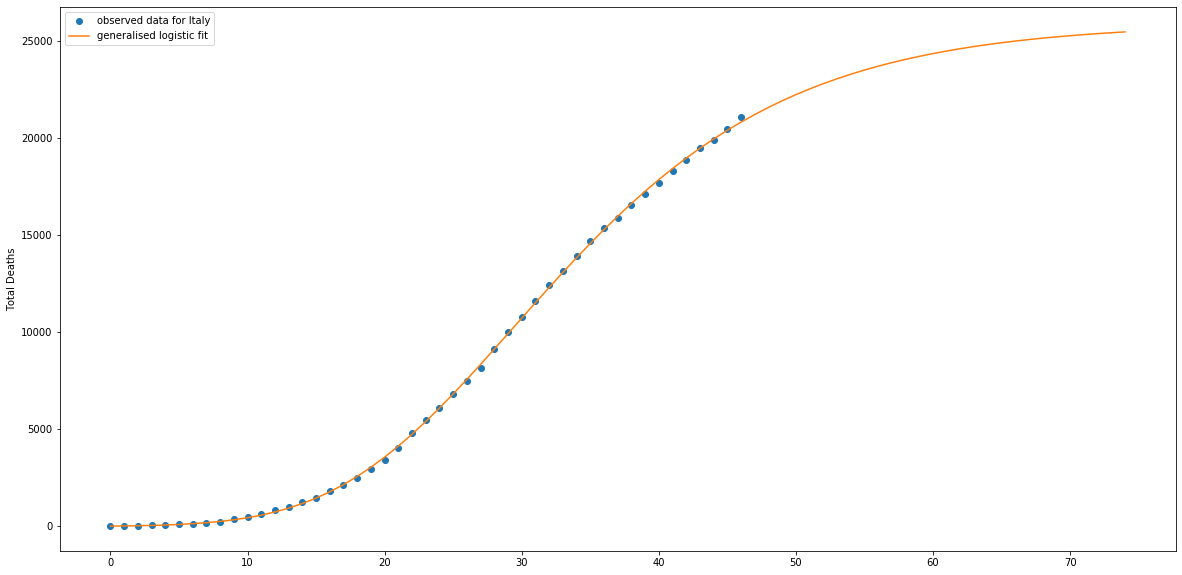

In [22]:
plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths")

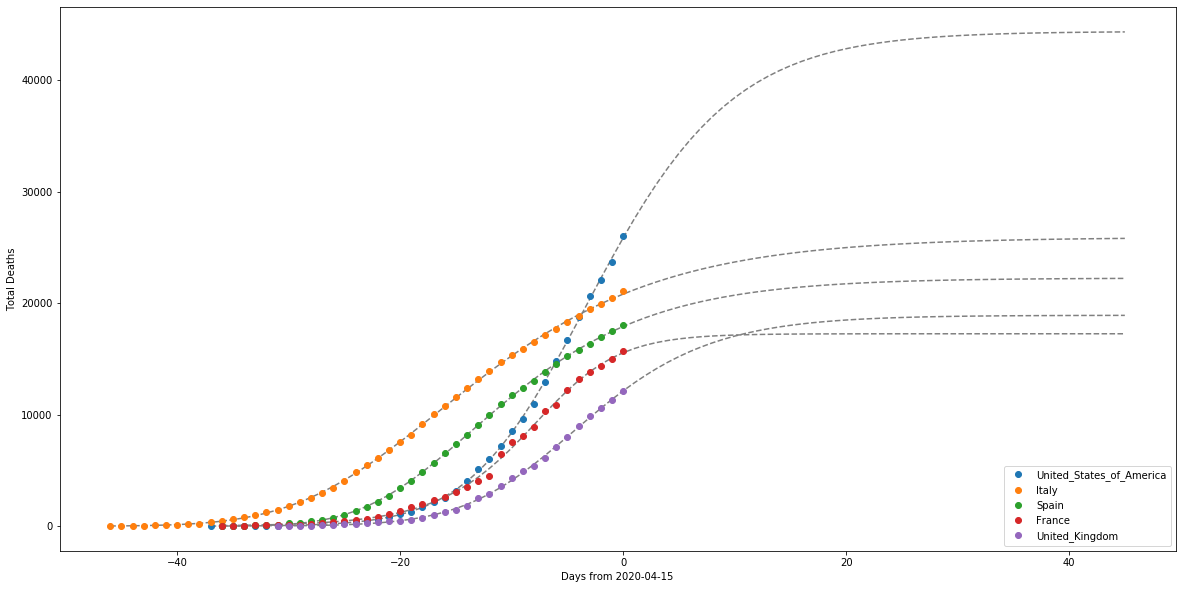

In [23]:
plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:5]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=4)